In [8]:
import pandas as pd
import numpy as np

# Load the datasets
daily_data = pd.read_csv('/mnt/c/Users/PMYLS/Downloads/142_maheen/archive (2)/salesdaily.csv')
hourly_data = pd.read_csv('/mnt/c/Users/PMYLS/Downloads/142_maheen/archive (2)/saleshourly.csv')
weekly_data = pd.read_csv('/mnt/c/Users/PMYLS/Downloads/142_maheen/archive (2)/salesweekly.csv')
monthly_data = pd.read_csv('/mnt/c/Users/PMYLS/Downloads/142_maheen/archive (2)/salesmonthly.csv')

# Display the first few rows of each dataset
print("Daily Data:")
print(daily_data.head())
print("\nHourly Data:")
print(hourly_data.head())
print("\nWeekly Data:")
print(weekly_data.head())
print("\nMonthly Data:")
print(monthly_data.head())

# Convert date columns to datetime
daily_data['datum'] = pd.to_datetime(daily_data['datum'], format='%m/%d/%Y')
hourly_data['datum'] = pd.to_datetime(hourly_data['datum'], format='%m/%d/%Y %H:%M')
weekly_data['datum'] = pd.to_datetime(weekly_data['datum'], format='%m/%d/%Y')
monthly_data['datum'] = pd.to_datetime(monthly_data['datum'], format='%Y-%m-%d')

# Handle missing values by filling with zeros
daily_data.fillna(0, inplace=True)
hourly_data.fillna(0, inplace=True)
weekly_data.fillna(0, inplace=True)
monthly_data.fillna(0, inplace=True)

# Standardize column names
daily_data.columns = daily_data.columns.str.strip().str.lower()
hourly_data.columns = hourly_data.columns.str.strip().str.lower()
weekly_data.columns = weekly_data.columns.str.strip().str.lower()
monthly_data.columns = monthly_data.columns.str.strip().str.lower()


Daily Data:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday  

Hourly Data:
            datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0   1/2/2014 8:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
1   1/2/2014 9:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2  1/2/2014 10:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   
3  1/2/2014 11:00    0.0   0.00    0.0    2.0   1.0  

In [12]:
# Add frequency indicator
daily_data['frequency'] = 'daily'
hourly_data['frequency'] = 'hourly'
weekly_data['frequency'] = 'weekly'
monthly_data['frequency'] = 'monthly'

# Concatenate all datasets
all_data = pd.concat([daily_data, hourly_data, weekly_data, monthly_data], ignore_index=True)

# Sort by date
all_data = all_data.sort_values(by='datum')

# Display the integrated data
print(all_data.head())

# Save the integrated data to a CSV file
all_data.to_csv('integrated_sales.csv', index=False)

                   datum  m01ab  m01ae  n02ba  n02be  n05b  n05c  r03  r06  \
0    2014-01-02 00:00:00    0.0   3.67    3.4   32.4   7.0   0.0  0.0  2.0   
2106 2014-01-02 08:00:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0   
2107 2014-01-02 09:00:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0   
2108 2014-01-02 10:00:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0   
2109 2014-01-02 11:00:00    0.0   0.00    0.0    2.0   1.0   0.0  0.0  0.0   

        year  month   hour weekday name frequency  
0     2014.0    1.0  248.0     Thursday     daily  
2106  2014.0    1.0    8.0     Thursday    hourly  
2107  2014.0    1.0    9.0     Thursday    hourly  
2108  2014.0    1.0   10.0     Thursday    hourly  
2109  2014.0    1.0   11.0     Thursday    hourly  


**Hadoop MapReduce Implementation Script**

**Start HDFS**
start-dfs.sh

**Start YARN**
start-yarn.sh

**Hadoop Implementation**

hdfs dfs -mkdir /user/your_username/sales_data

hdfs dfs -ls /user/Integrated_sales.csv/

hadoop jar /home/pmyls/hadoop-3.4.0/share/hadoop/tools/lib/hadoop-streaming-3.4.0.jar \
    -input //user/Integrated_sales.csv \
    -output /output_new/ \
    -mapper /media/mapper.py \
    -reducer /media/reducer.py

hdfs dfs -ls /output_new/

**Display the output**

cat output.txt

**Stop Hadoop services**

stop-yarn.sh
stop-dfs.sh


In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
# Initialize Spark session in local mode
spark = SparkSession.builder \
    .appName("SalesAnalysis") \
    .master("local[*]") \
    .getOrCreate()

# Initialize Spark session
#spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

# Load the integrated dataset
data = spark.read.csv('file:///mnt/c/Users/PMYLS/Downloads/142_maheen/integrated_sales.csv', header=True, inferSchema=True)

# Show the first few rows
data.show()

# Data analysis: Count the number of entries per frequency type
data.groupBy("frequency").count().show()

# More advanced analysis: Find the average sales for each product type
product_columns = ['m01ab', 'm01ae', 'n02ba', 'n02be', 'n05b', 'n05c', 'r03', 'r06']
for col_name in product_columns:
    data.groupBy("frequency").agg({col_name: "avg"}).show()

# Save the processed data for further analysis or machine learning tasks
data.write.csv('file:///mnt/c/Users/PMYLS/Downloads/142_maheen/spark_processed_sales.csv', header=True, mode='overwrite')

# Stop the Spark session
spark.stop()


+-------------------+-----+-----+-----+-----+----+----+----+---+------+-----+-----+------------+---------+
|              datum|m01ab|m01ae|n02ba|n02be|n05b|n05c| r03|r06|  year|month| hour|weekday name|frequency|
+-------------------+-----+-----+-----+-----+----+----+----+---+------+-----+-----+------------+---------+
|2014-01-02 00:00:00|  0.0| 3.67|  3.4| 32.4| 7.0| 0.0| 0.0|2.0|2014.0|  1.0|248.0|    Thursday|    daily|
|2014-01-02 08:00:00|  0.0| 0.67|  0.4|  2.0| 0.0| 0.0| 0.0|1.0|2014.0|  1.0|  8.0|    Thursday|   hourly|
|2014-01-02 09:00:00|  0.0|  0.0|  1.0|  0.0| 2.0| 0.0| 0.0|0.0|2014.0|  1.0|  9.0|    Thursday|   hourly|
|2014-01-02 10:00:00|  0.0|  0.0|  0.0|  3.0| 2.0| 0.0| 0.0|0.0|2014.0|  1.0| 10.0|    Thursday|   hourly|
|2014-01-02 11:00:00|  0.0|  0.0|  0.0|  2.0| 1.0| 0.0| 0.0|0.0|2014.0|  1.0| 11.0|    Thursday|   hourly|
|2014-01-02 12:00:00|  0.0|  2.0|  0.0|  5.0| 2.0| 0.0| 0.0|0.0|2014.0|  1.0| 12.0|    Thursday|   hourly|
|2014-01-02 13:00:00|  0.0|  1.0|  2.

+---------+-----+
|frequency|count|
+---------+-----+
|   weekly|  302|
|  monthly|   70|
|    daily| 2106|
|   hourly|50532|
+---------+-----+



+---------+-------------------+
|frequency|         avg(m01ab)|
+---------+-------------------+
|   weekly|  35.10244067327817|
|  monthly| 149.99200000000005|
|    daily|  5.033683325419751|
|   hourly|0.20978661211426378|
+---------+-------------------+

+---------+-------------------+
|frequency|         avg(m01ae)|
+---------+-------------------+
|   weekly| 27.167611410066222|
|  monthly| 116.51428571428575|
|    daily|  3.895830316160027|
|   hourly|0.16236481132484365|
+---------+-------------------+

+---------+------------------+
|frequency|        avg(n02ba)|
+---------+------------------+
|   weekly|27.060294701986745|
|  monthly|115.02084285714281|
|    daily|3.8804411206082663|
|   hourly|0.1617234425714004|
+---------+------------------+

+---------+-----------------+
|frequency|       avg(n02be)|
+---------+-----------------+
|   weekly|208.6271612860926|
|  monthly|892.5420714285714|
|    daily|29.91709530310537|
|   hourly|1.246841658916031|
+---------+----------------

Data loaded successfully.
                           datum m01ab m01ae n02ba n02be n05b n05c  r03  r06  \
0  2014-01-02T00:00:00.000+05:00   0.0  3.67   3.4  32.4  7.0  0.0  0.0  2.0   
1  2014-01-02T08:00:00.000+05:00   0.0  0.67   0.4   2.0  0.0  0.0  0.0  1.0   
2  2014-01-02T09:00:00.000+05:00   0.0   0.0   1.0   0.0  2.0  0.0  0.0  0.0   
3  2014-01-02T10:00:00.000+05:00   0.0   0.0   0.0   3.0  2.0  0.0  0.0  0.0   
4  2014-01-02T11:00:00.000+05:00   0.0   0.0   0.0   2.0  1.0  0.0  0.0  0.0   

     year month   hour weekday name frequency  
0  2014.0   1.0  248.0     Thursday     daily  
1  2014.0   1.0    8.0     Thursday    hourly  
2  2014.0   1.0    9.0     Thursday    hourly  
3  2014.0   1.0   10.0     Thursday    hourly  
4  2014.0   1.0   11.0     Thursday    hourly  
datum           object
m01ab           object
m01ae           object
n02ba           object
n02be           object
n05b            object
n05c            object
r03             object
r06             objec

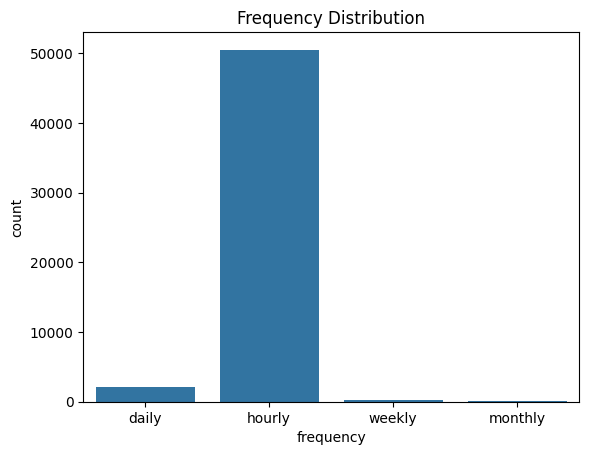

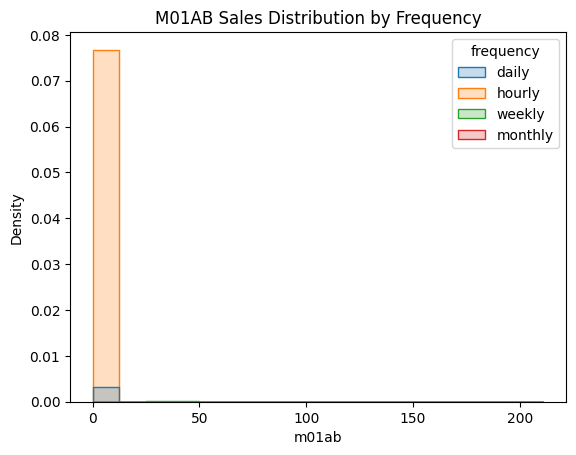

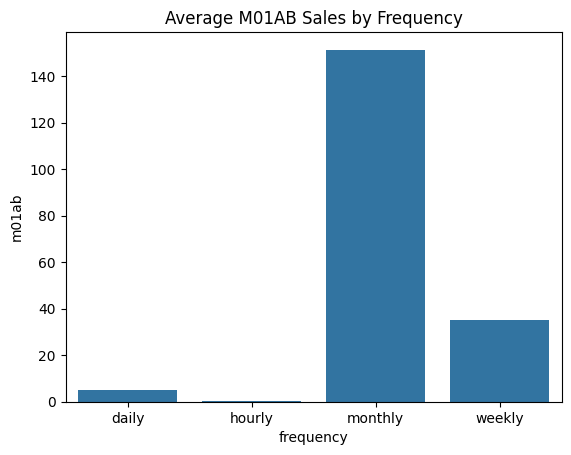

  frequency    m01ab
0     daily    4.990
1    hourly    0.000
2   monthly  154.635
3    weekly   34.650


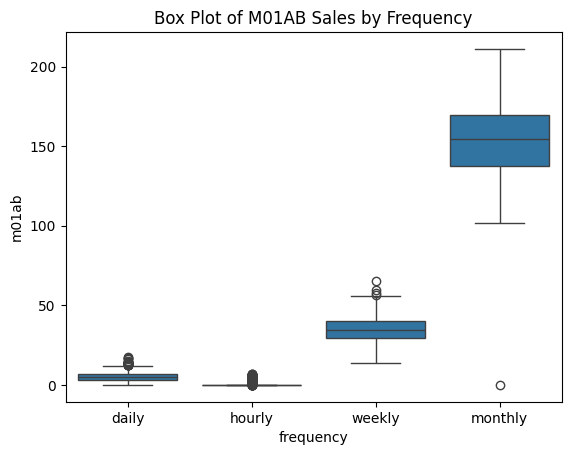

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the processed data
data = pd.read_csv('./spark_processed_sales/spark_processed_sales.csv')
print("Data loaded successfully.")

# Check the first few rows of the DataFrame
print(data.head())

# Check the data types
print(data.dtypes)

# Convert 'm01ab' to numeric if it's not already
if data['m01ab'].dtype == object:
    data['m01ab'] = pd.to_numeric(data['m01ab'], errors='coerce')

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values in 'm01ab' if any
data = data.dropna(subset=['m01ab'])

# Count plot for the 'frequency' column
sns.countplot(x='frequency', data=data)
plt.title('Frequency Distribution')
plt.show()

# Distribution plot for sales of 'M01AB'
sns.histplot(data=data, x='m01ab', hue='frequency', element='step', stat='density')
plt.title('M01AB Sales Distribution by Frequency')
plt.show()

# Average sales per frequency type
avg_sales = data.groupby('frequency')['m01ab'].mean().reset_index()
sns.barplot(x='frequency', y='m01ab', data=avg_sales)
plt.title('Average M01AB Sales by Frequency')
plt.show()

# Median sales per frequency type
median_sales = data.groupby('frequency')['m01ab'].median().reset_index()
print(median_sales)

# Box plot of M01AB sales by frequency
sns.boxplot(x='frequency', y='m01ab', data=data)
plt.title('Box Plot of M01AB Sales by Frequency')
plt.show()
